
There is an Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.


## Imports


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Geting the Data

Ecommerce Customers csv file has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [0]:
customers = pd.read_csv("Ecommerce Customers")

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis


In [0]:
sns.set_palette("YlOrBr_r")
sns.set_style('ticks')

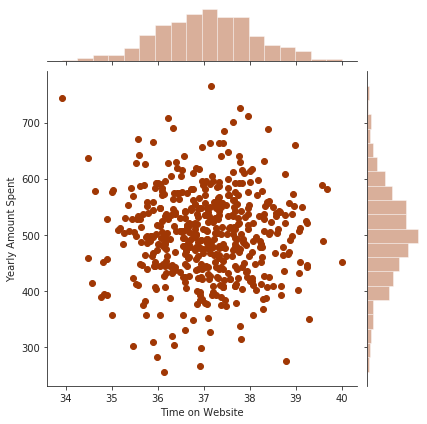

In [13]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

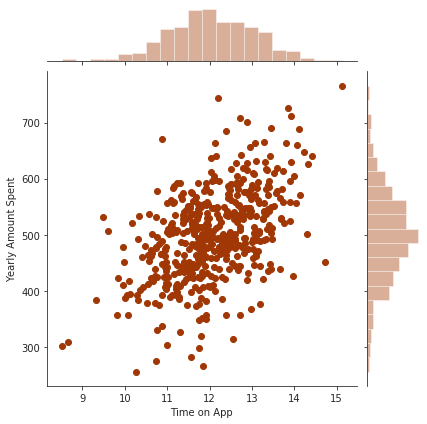

In [14]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**2D hex bin plot comparing Time on App and Length of Membership.**

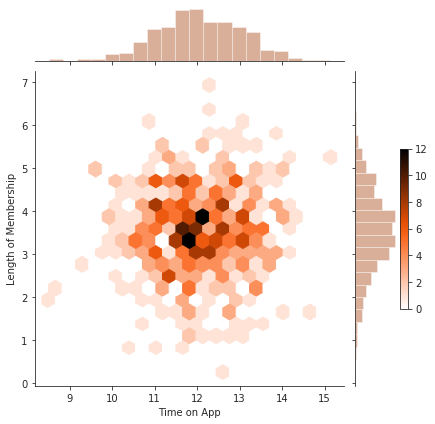

In [18]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)
plt.colorbar()

**pairplot**

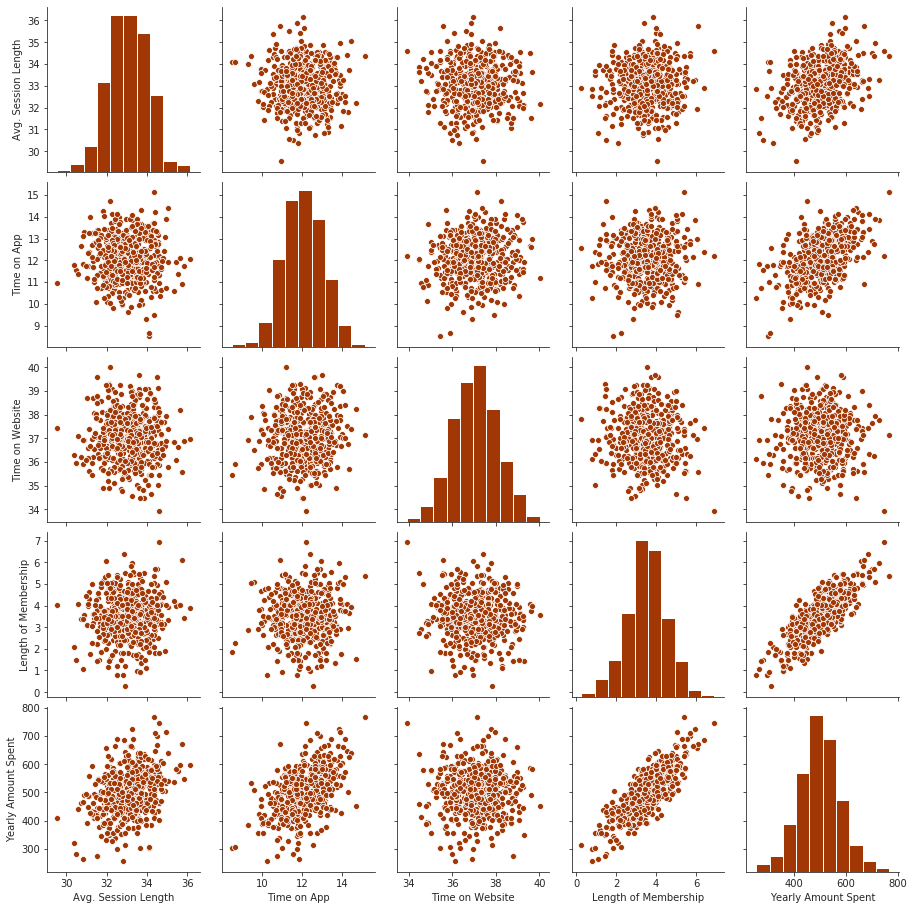

In [16]:
sns.pairplot(customers)

**linear model plot of  Yearly Amount Spent vs. Length of Membership.**

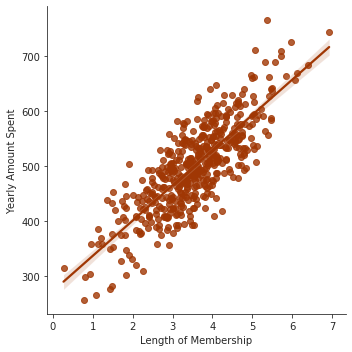

In [19]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data


In [0]:
y = customers['Yearly Amount Spent']

In [0]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Coefficients of the model**

In [27]:
# The coefficients
print('Coefficients: \n', lm.coef_)
print('intercept:',lm.intercept_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]
intercept: -1047.932782250239


## Predicting Test Data


In [0]:
predictions = lm.predict( X_test)

**scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

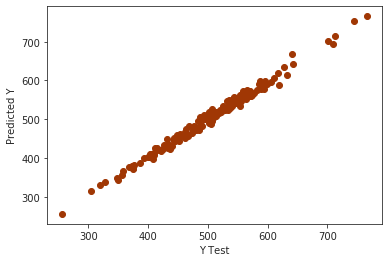

In [29]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model


In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.explained_variance_score(y_test, predictions))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626
R^2: 0.9890771231889607


## Residuals


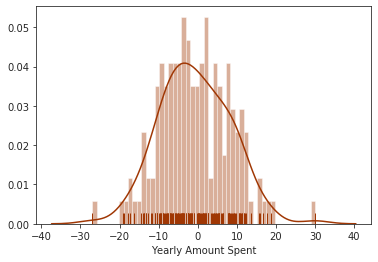

In [34]:
sns.distplot((y_test-predictions), rug=True,bins=50);

## Conclusion


In [35]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**interpretation of coefficients**


- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Insight**


Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. 